In [1]:
import pandas as pd
import numpy as np
from plot_cdf import plot_cdf, plot_cdf_multiple
import matplotlib.pyplot as plt
import json
import os
import glob
import itertools

In [2]:
from matplotlib import rcParams
#IEEE Times New Roman (Nimbus Roman)
rcParams['text.latex.preamble'] = r"\usepackage{mathptmx}"

#Latex in general
rcParams['font.family'] = "serif"
rcParams['font.serif'] = ['Computer Modern']
rcParams['text.usetex'] = True

## Create pickle for plot

In [3]:
result_dir = os.listdir("/home/det_user/dmarkudova/RL_rtc/output_mp/")
big_list_results = []

for filename in result_dir:
    
    # if (not "reward_profile" in filename) or (not "seed" in filename):
    #     continue
    # if ("big_trace2" in filename) or (not "seed_22" in filename):
    #     continue
    if ("big_trace2" in filename):
        continue
    
    pickle_path = "../output_mp/" + filename
    l_rate = pd.read_pickle(pickle_path)
    conf_name = pickle_path.split("/")[2].split(".")[0][17:]
    if "big_trace2" in pickle_path:
        trace_name = "./big_trace/big_trace2.json"
    else:
        trace_name = "./traces/" + pickle_path.split("_")[5] + "_" + pickle_path.split("_")[6] + ".json"
    
    d_splitted = conf_name.split("_")
    alg = d_splitted[0]
    step_time = int(d_splitted[3])
    
    if "seed" in d_splitted:
        seed = int(d_splitted[15])
    else:
        seed = 0
    
    if "reward" in d_splitted: 
        reward_profile = int(d_splitted[13])
    else:
        reward_profile = 0
    
    if d_splitted[5] == "True":
        delay_states = True
    else:
        delay_states = False
    if d_splitted[8] == "True":
        normalize_states = True
    else:
        normalize_states = False
    if d_splitted[10].split(".")[0] == "True":
        tuned = True
    else:
        tuned = False
        
    if normalize_states == False:
        continue
    
    avg_reward_list = []
    cum_reward_list = []
    for i in range(15):
        if i in l_rate[trace_name].keys():
            reward_series = pd.Series(l_rate[trace_name][i]["reward"])
            avg_reward_list.append(reward_series.mean())
            cum_reward_list.append(reward_series.sum())
    
    d_final = {
         'trace': trace_name.split("/")[2].split(".")[0],
         'delay_states': delay_states,
         'normalize_states': normalize_states,
         'step_time': step_time,
         'alg': alg,
         'tuned': tuned,
         'last_cum_reward': cum_reward_list[-1],
         'last_avg_reward': avg_reward_list[-1],
         'cum_reward_list': cum_reward_list,
         'avg_reward_list': avg_reward_list,
         'name': conf_name,
         'reward_profile': reward_profile,
         'seed': seed,
        }
    
    big_list_results.append(d_final)

In [4]:
df = pd.DataFrame(big_list_results)
df

,trace,delay_states,normalize_states,step_time,alg,tuned,last_cum_reward,last_avg_reward,cum_reward_list,avg_reward_list,name,reward_profile,seed
0,4G_3mbps,False,True,400,TD3,True,-80.495069,-0.526112,"[-82.89147700000001, -72.38274, -70.8922977, -...","[-0.5417743594771243, -0.4730898039215687, -0....",TD3_4G_3mbps_400_delay_False_norm_states_True_...,0,0
1,5G_13mbps,False,True,200,TD3,False,-43.209139,-0.142135,"[-44.765443899999994, -50.7771878, -38.8453823...","[-0.14725474967105265, -0.16703022302631573, -...",TD3_5G_13mbps_200_delay_False_norm_states_True...,0,22
2,WIRED_200kbps,False,True,400,SAC,False,205.404080,0.368108,"[204.12852, 136.8304, 135.86536, 121.205080000...","[0.36582172043010697, 0.24521577060931893, 0.2...",SAC_WIRED_200kbps_400_delay_False_norm_states_...,0,0
3,4G_700kbps,False,True,200,TD3,True,73.979502,0.138538,"[-20.804785247683206, 67.02557812554427, 58.92...","[-0.038960271999406736, 0.12551606390551362, 0...",TD3_4G_700kbps_200_delay_False_norm_states_Tru...,0,6
4,WIRED_900kbps,False,True,400,SAC,True,75.290240,0.519243,"[63.150600000000004, 67.36788000000001, 63.466...","[0.4355213793103449, 0.46460606896551754, 0.43...",SAC_WIRED_900kbps_400_delay_False_norm_states_...,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,WIRED_35mbps,True,True,200,TD3,False,-15.419165,-0.050225,"[-15.4020051, -15.5979967, -14.417606799999998...","[-0.05016939771986972, -0.05080780684039084, -...",TD3_WIRED_35mbps_200_delay_True_norm_states_Tr...,0,0
447,4G_700kbps,True,True,600,SAC,True,19.090760,0.107251,"[20.838880000000003, 18.667720000000003, 15.73...","[0.11707235955056189, 0.10487483146067414, 0.0...",SAC_4G_700kbps_600_delay_True_norm_states_True...,0,0
448,WIRED_200kbps,False,True,200,TD3,False,138.367600,0.124097,"[202.76868000000002, 249.86560000000003, 277.9...","[0.18185531838565003, 0.22409470852017943, 0.2...",TD3_WIRED_200kbps_200_delay_False_norm_states_...,1,36
449,4G_500kbps,True,True,200,SAC,True,45.528148,0.085740,"[44.60854055623731, 28.418914061476695, 29.030...","[0.08400855095336604, 0.05351961216850599, 0.0...",SAC_4G_500kbps_200_delay_True_norm_states_True...,0,22


## Make small df for plot

In [5]:
dff = df[((df.trace == "4G_700kbps") & \
                  (df.last_cum_reward > 0) & \
                 (df.step_time == 200) & \
                  (df.reward_profile == 0) & \
                  (df.seed.isin([0,5,6])) & \
                 (df.tuned == True))
                ]
dff

,trace,delay_states,normalize_states,step_time,alg,tuned,last_cum_reward,last_avg_reward,cum_reward_list,avg_reward_list,name,reward_profile,seed
3,4G_700kbps,False,True,200,TD3,True,73.979502,0.138538,"[-20.804785247683206, 67.02557812554427, 58.92...","[-0.038960271999406736, 0.12551606390551362, 0...",TD3_4G_700kbps_200_delay_False_norm_states_Tru...,0,6
25,4G_700kbps,False,True,200,SAC,True,61.294487,0.114784,"[48.02297673832325, 50.90250767240016, 55.6147...","[0.08993066804929452, 0.09532304807565567, 0.1...",SAC_4G_700kbps_200_delay_False_norm_states_Tru...,0,6
48,4G_700kbps,False,True,200,TD3,True,76.509000,0.143275,"[-0.17272000000000154, 57.59024, 82.45944, 60....","[-0.00032344569288388905, 0.10784689138576786,...",TD3_4G_700kbps_200_delay_False_norm_states_Tru...,0,0
62,4G_700kbps,True,True,200,TD3,True,95.141604,0.178168,"[-305.399113536266, 75.53832440551001, 76.5580...","[-0.5719084523151045, 0.14145753633990638, 0.1...",TD3_4G_700kbps_200_delay_True_norm_states_True...,0,5
71,4G_700kbps,True,True,200,SAC,True,87.738320,0.164304,"[49.33860000000001, 68.91236, 49.4402000000000...","[0.09239438202247192, 0.12904936329588015, 0.0...",SAC_4G_700kbps_200_delay_True_norm_states_True...,0,0
114,4G_700kbps,False,True,200,SAC,True,57.200619,0.107117,"[74.4312515641789, 65.64103837386662, 57.15443...","[0.13938436622505412, 0.12292329283495633, 0.1...",SAC_4G_700kbps_200_delay_False_norm_states_Tru...,0,5
129,4G_700kbps,True,True,200,TD3,True,76.833664,0.143883,"[-214.91942049888775, 39.532313831484196, 21.3...","[-0.402470824904284, 0.07403055024622514, 0.03...",TD3_4G_700kbps_200_delay_True_norm_states_True...,0,6
176,4G_700kbps,True,True,200,TD3,True,101.976280,0.190967,"[24.73576, 69.70612000000001, 82.76232, 81.217...","[0.04632164794007491, 0.13053580524344563, 0.1...",TD3_4G_700kbps_200_delay_True_norm_states_True...,0,0
281,4G_700kbps,True,True,200,SAC,True,67.717356,0.126812,"[33.552882578662846, 22.430676905932437, 32.50...","[0.06283311344318891, 0.04200501293245779, 0.0...",SAC_4G_700kbps_200_delay_True_norm_states_True...,0,6
293,4G_700kbps,False,True,200,SAC,True,47.596480,0.089132,"[67.93524, 44.22632, 61.43112000000001, 54.796...","[0.1272195505617978, 0.0828208239700375, 0.115...",SAC_4G_700kbps_200_delay_False_norm_states_Tru...,0,0


In [6]:
df_grouped = dff.groupby(["trace", "normalize_states", "tuned", "step_time", "reward_profile", "delay_states", "alg", "seed"]).first()
df_grouped

last_cum_reward  \
trace      normalize_states tuned step_time reward_profile delay_states alg seed                    
4G_700kbps True             True  200       0              False        SAC 0           47.596480   
                                                                            5           57.200619   
                                                                            6           61.294487   
                                                                        TD3 0           76.509000   
                                                                            5           81.349154   
                                                                            6           73.979502   
                                                           True         SAC 0           87.738320   
                                                                            5           57.309067   
                                                                            6           67.717356   
                                                                        TD3 0          101.976280   
                                                                            5           95.141604   
                                                                            6           76.833664   

                                                                                  last_avg_reward  \
trace      normalize_states tuned step_time reward_profile delay_states alg seed                    
4G_700kbps True             True  200       0              False        SAC 0            0.089132   
                                                                            5            0.107117   
                                                                            6            0.114784   
                                                                        TD3 0            0.143275   
                                                                            5            0.152339   
                                                                            6            0.138538   
                                                           True         SAC 0            0.164304   
                                                                            5            0.107320   
                                                                            6            0.126812   
                                                                        TD3 0            0.190967   
                                                                            5            0.178168   
                                                                            6            0.143883   

                                                                                                                    cum_reward_list  \
trace      normalize_states tuned step_time reward_profile delay_states alg seed                                                      
4G_700kbps True             True  200       0              False        SAC 0     [67.93524, 44.22632, 61.43112000000001, 54.796...   
                                                                            5     [74.4312515641789, 65.64103837386662, 57.15443...   
                                                                            6     [48.02297673832325, 50.90250767240016, 55.6147...   
                                                                        TD3 0     [-0.17272000000000154, 57.59024, 82.45944, 60....   
                                                                            5     [-20.52674907563927, 62.589956893673836, 72.09...   
                                                                            6     [-20.804785247683206, 67.02557812554427, 58.92...   
                                                           True         SAC 0     [49.33860000000001, 68.91236, 49.4402000000000...   
                                     

In [7]:
def mean_list(x):
    #make average between values of x.iloc[0], x.iloc[1], x.iloc[2]
    # for i in len(x.iloc[])
    # print(x.iloc[1][0])
    avg_l = []
    for i in range(10):
        # print(x.iloc[0][i])
        avg_rew = (x.iloc[0][i] + x.iloc[1][i] + x.iloc[2][i]) / 3
        # print(avg_rew)
        avg_l.append(avg_rew)
    return avg_l

In [8]:
# def mean_list(x):
#     # print(x)
#     return x

In [9]:
df_final = dff.groupby(["trace", "delay_states", "alg"]).agg({"avg_reward_list": mean_list})
df_final

avg_reward_list
trace      delay_states alg                                                   
4G_700kbps False        SAC  [0.11884486161204881, 0.10035572162688317, 0.1...
                        TD3  [-0.026082762326893383, 0.11750762679497151, 0...
           True         SAC  [0.09034250704328346, 0.09886416690608496, 0.0...
                        TD3  [-0.3093525430931045, 0.11534129727652571, 0.1...

In [12]:
dict_names = {
('4G_700kbps', False, 'TD3'): "TD3, not delayed",
('4G_700kbps', True, 'SAC'): "SAC, delayed",
('4G_700kbps', True, 'TD3'): "TD3, delayed",
('4G_700kbps', False, 'SAC'): "SAC, not delayed",
}

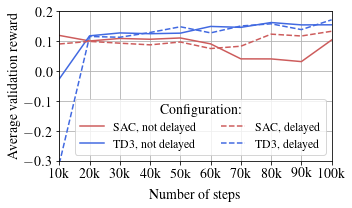

In [24]:
linestyles = ["solid", "dashed", "dotted", "dashdot", (0, (3, 1, 1, 1))]
ls1 = itertools.cycle(linestyles)
ls2 = itertools.cycle(linestyles)
fontsize=14
figsize=(5,3)
# (6,3.5)
plt.figure(figsize=figsize)

for conf, row in df_final["avg_reward_list"].iteritems():
    # print(dict_names[conf])
    name = dict_names[conf]
    data = row
    if "SAC" in name:
        plt.plot(data, label=name, color="indianred", ls=next(ls1))
    else:
        plt.plot(data, label=name, color="royalblue", ls=next(ls2))
    plt.xticks(range(0,10), [f"{i}k" for i in range(10,110, 10)], fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    # plt.xlim(-0.2, 9.2)
    plt.xlim(0, 9)
    plt.ylim(-0.3, 0.20)
    plt.xlabel("Number of steps", labelpad=8, fontsize=fontsize)
    plt.ylabel("Average validation reward", fontsize=fontsize)
    
plt.grid()
legend = plt.legend(loc="lower right", ncol=2, title="Configuration:", fontsize=fontsize-2)
plt.setp(legend.get_title(),fontsize=14)

plt.tight_layout()
plt.savefig("plots/validation_example_avg_3_random_seeds.pdf", bbox_inches='tight')

## Make plot by reading pickle

In [ ]:
# df_for_plot = dff.loc[[170, 336, 68, 286]]
# df_for_plot.to_pickle("df_for_validation_plot.pickle")

In [39]:
# df_for_plot = pd.read_pickle("df_for_validation_plot.pickle")

In [40]:
# dict_names = {
# "TD3_4G_700kbps_200_delay_False_norm_states_True_tuned_True": "TD3, not delayed, tuned",
# "SAC_4G_700kbps_200_delay_True_norm_states_True_tuned_True": "SAC, delayed, tuned",
# "TD3_4G_700kbps_200_delay_True_norm_states_True_tuned_True": "TD3, delayed, tuned",
# "SAC_4G_700kbps_200_delay_False_norm_states_True_tuned_True": "SAC, not delayed, tuned",
# }

## TODO: Make this plot as average over 3 runs with diff random seeds

In [19]:
# linestyles = ["solid", "dashed", "dotted", "dashdot", (0, (3, 1, 1, 1))]
# ls1 = itertools.cycle(linestyles)
# ls2 = itertools.cycle(linestyles)
# fontsize = 14

# plt.figure(figsize=(8,3))
# for i, row in df_for_plot.iterrows():
#     name = row["name"]
#     data = row.avg_reward_list
#     if "SAC" in name:
#         plt.plot(data, label=dict_names[name], color="indianred", ls=next(ls1))
#     else:
#         plt.plot(data, label=dict_names[name], color="royalblue", ls=next(ls2))
#     plt.xticks(range(0,10), [f"{i}k" for i in range(10,110, 10)], fontsize=fontsize)
#     plt.yticks(fontsize=fontsize)
#     # plt.xlim(-0.2, 9.2)
#     plt.xlim(0, 9)
#     plt.ylim(-0.05, 0.20)
#     plt.xlabel("Number of steps", labelpad=8, fontsize=fontsize)
#     plt.ylabel("Average reward", fontsize=fontsize)
    
# plt.grid()
# # plt.legend(loc="lower right", ncol=2, title="Configuration:", fontsize=10)
# legend = plt.legend(title="Configuration:", bbox_to_anchor=(1.03,0.83), fontsize=12)
# plt.setp(legend.get_title(),fontsize=12)
# plt.tight_layout()

# # plt.savefig("plots/validation_example.pdf", bbox_inches='tight')

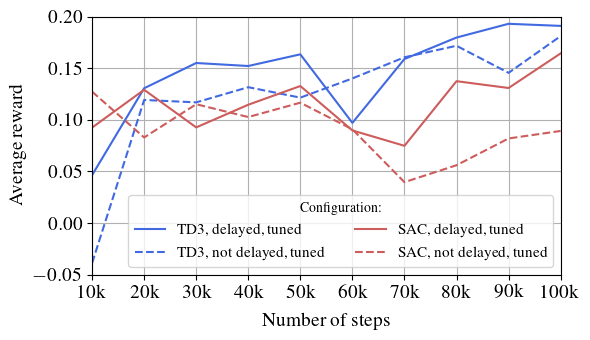

In [98]:
# linestyles = ["solid", "dashed", "dotted", "dashdot", (0, (3, 1, 1, 1))]
# ls1 = itertools.cycle(linestyles)
# ls2 = itertools.cycle(linestyles)
# fontsize = 14

# plt.figure(figsize=(6,3.5))
# for i, row in df_for_plot.iterrows():
#     name = row["name"]
#     data = row.avg_reward_list
#     if "SAC" in name:
#         plt.plot(data, label=dict_names[name], color="indianred", ls=next(ls1))
#     else:
#         plt.plot(data, label=dict_names[name], color="royalblue", ls=next(ls2))
#     plt.xticks(range(0,10), [f"{i}k" for i in range(10,110, 10)], fontsize=fontsize)
#     plt.yticks(fontsize=fontsize)
#     # plt.xlim(-0.2, 9.2)
#     plt.xlim(0, 9)
#     plt.ylim(-0.05, 0.20)
#     plt.xlabel("Number of steps", labelpad=8, fontsize=fontsize)
#     plt.ylabel("Average reward", fontsize=fontsize)
    
# plt.grid()
# plt.legend(loc="lower right", ncol=2, title="Configuration:", fontsize=11)
# # legend = plt.legend(title="Configuration:", bbox_to_anchor=(1.03,0.83), fontsize=12)
# plt.setp(legend.get_title(),fontsize=12)
# plt.tight_layout()

# plt.savefig("plots/validation_example.pdf", bbox_inches='tight')

In [3]:
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [10]:
## Make conf dict for diff random seeds
from conf_dict_util import conf_to_dict

conf_list = [
"TD3_4G_700kbps_200_delay_False_norm_states_True_tuned_True_reward_profile_0_seed_5",
"TD3_4G_700kbps_200_delay_False_norm_states_True_tuned_True_reward_profile_0_seed_6",

"SAC_4G_700kbps_200_delay_True_norm_states_True_tuned_True_reward_profile_0_seed_5",
"SAC_4G_700kbps_200_delay_True_norm_states_True_tuned_True_reward_profile_0_seed_6",

"TD3_4G_700kbps_200_delay_True_norm_states_True_tuned_True_reward_profile_0_seed_5",
    "TD3_4G_700kbps_200_delay_True_norm_states_True_tuned_True_reward_profile_0_seed_6",

"SAC_4G_700kbps_200_delay_False_norm_states_True_tuned_True_reward_profile_0_seed_5",
    "SAC_4G_700kbps_200_delay_False_norm_states_True_tuned_True_reward_profile_0_seed_6",
]

conf_dict_list = []
for i in conf_list:
    conf_dict_list.append(conf_to_dict(i))
    

In [13]:
import pickle
with open('../diff_random_seeds.pkl', 'wb') as f:
    pickle.dump(conf_dict_list, f)